# Post-Processing Example 1 - Extracting Depth Maps from GemPy Models

This post-processing example shows how to extract depth maps from GemPy Models to illustrate the depths of modeled surfaces. This can be used for further applications. 

## Licensing

Computational Geosciences and Reservoir Engineering, RWTH Aachen University, Authors: Alexander Juestel. For more information contact: alexander.juestel(at)rwth-aachen.de


This work is licensed under a Creative Commons Attribution 4.0 International License (http://creativecommons.org/licenses/by/4.0/)

## Import GemGIS

If you have installed ``GemGIS`` via pip or conda, you can import ``GemGIS`` like any other package. If you have downloaded the repository, append the path to the directory where the ``GemGIS`` repository is stored and then import ``GemGIS``. 

In [11]:
import warnings
warnings.filterwarnings("ignore")
import gemgis as gg

## Importing Libraries

In [15]:
import numpy as np
import pyvista as pv
import pandas as pd

## Recomputing Model Example 5
Example 5 will be used to demonstrate how to extract depth maps from GemPy models. First, it will be recalculated. 

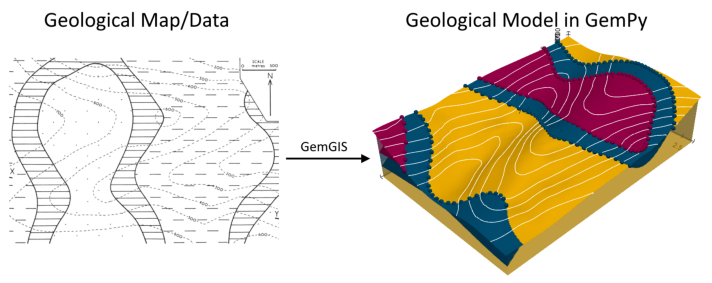

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('../data/images/example5/cover_example05.png')
plt.figure(figsize=(10, 10))
imgplot = plt.imshow(img)
plt.axis('off')
plt.tight_layout()

In [7]:
import gempy as gp

geo_model = gp.create_model('Model5')

gp.init_data(geo_model, [0, 3942, 0, 2710, -200, 1000], [100, 100, 100],
             path_i = '../data/postproc1_depth_maps/interfaces_example05.csv',
             path_o = '../data/postproc1_depth_maps/orientations_example05.csv',
             default_values=True)

gp.map_stack_to_surfaces(geo_model,
                         {
                          'Strata1': ('A', 'B'),
                         },
                         remove_unused_series=True)
geo_model.add_surfaces('Basement')
geo_model.set_topography(source='gdal', filepath='../data/postproc1_depth_maps/raster5.tif')
gp.set_interpolator(geo_model,
                    compile_theano=True,
                    theano_optimizer='fast_compile',
                    verbose=[],
                    update_kriging=False
                    )

sol = gp.compute_model(geo_model, compute_mesh=True)

Active grids: ['regular']
Cropped raster to geo_model.grid.extent.
depending on the size of the raster, this can take a while...
storing converted file...
Active grids: ['regular' 'topography']
Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                         values
range              4931.882399
$C_o$            579130.095238
drift equations         [3, 3]


C:\Users\ale93371\Anaconda3\envs\test_gempy\lib\site-packages\pyvista\plotting\plotting.py:1948: PyvistaDeprecationWarning: 
"stitle" is a depreciated keyword and will be removed in a future
release.

Use ``scalar_bar_args`` instead.  For example:

scalar_bar_args={'title': 'Scalar Bar Title'}

  warnings.warn(USE_SCALAR_BAR_ARGS, PyvistaDeprecationWarning)
C:\Users\ale93371\Anaconda3\envs\test_gempy\lib\site-packages\pyvista\jupyter\notebook.py:60: UserWarning: Failed to use notebook backend: 

Please install `ipyvtklink` to use this feature: https://github.com/Kitware/ipyvtklink

Falling back to a static output.
  warnings.warn(f'Failed to use notebook backend: \n\n{e}\n\n'


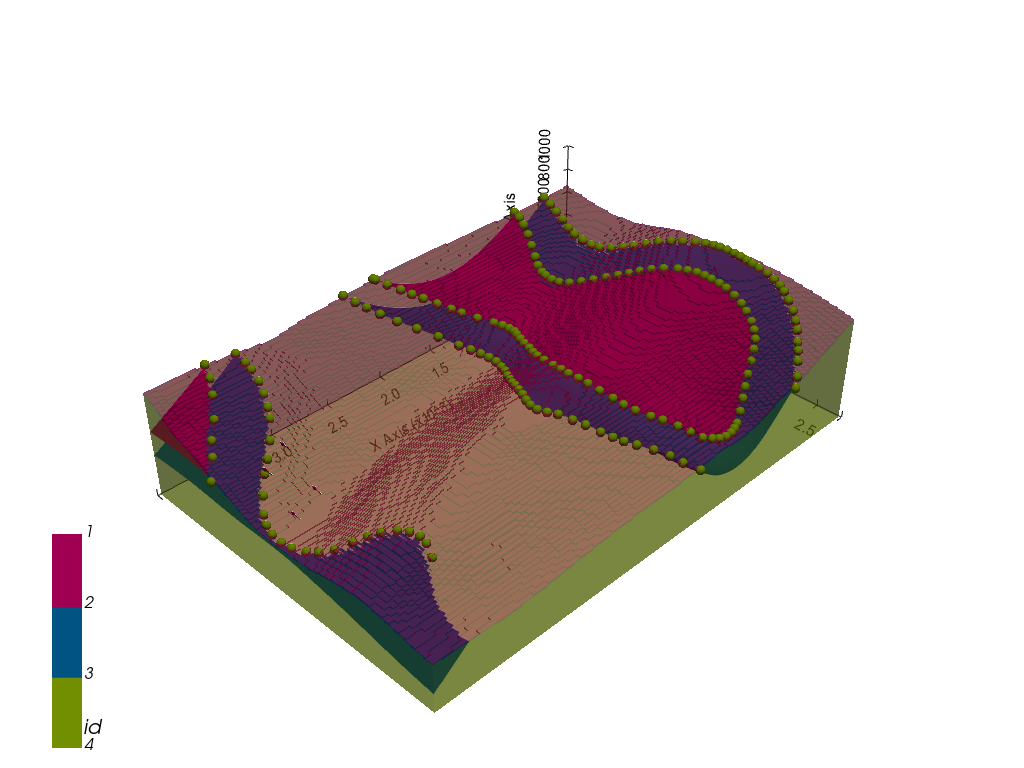

In [9]:
gpv = gp.plot_3d(geo_model, image=False, show_topography=False,
                 plotter_type='basic', notebook=True, show_lith=True)

## Extracting the meshes from the Gempy model


In [13]:
mesh_dict = gg.visualization.create_depth_maps_from_gempy(geo_model, ['A', 'B'])
mesh_dict

{'A': [PolyData (0x1d8062a6be0)
    N Cells:	12799
    N Points:	6765
    X Bounds:	4.250e+02, 3.922e+03
    Y Bounds:	1.355e+01, 2.615e+03
    Z Bounds:	2.374e+02, 7.180e+02
    N Arrays:	1,
  '#9f0052'],
 'B': [PolyData (0x1d80ac925e0)
    N Cells:	29559
    N Points:	15359
    X Bounds:	4.587e+01, 3.922e+03
    Y Bounds:	1.355e+01, 2.696e+03
    Z Bounds:	-4.334e+01, 7.420e+02
    N Arrays:	1,
  '#015482']}

## Plotting the meshes as depth maps

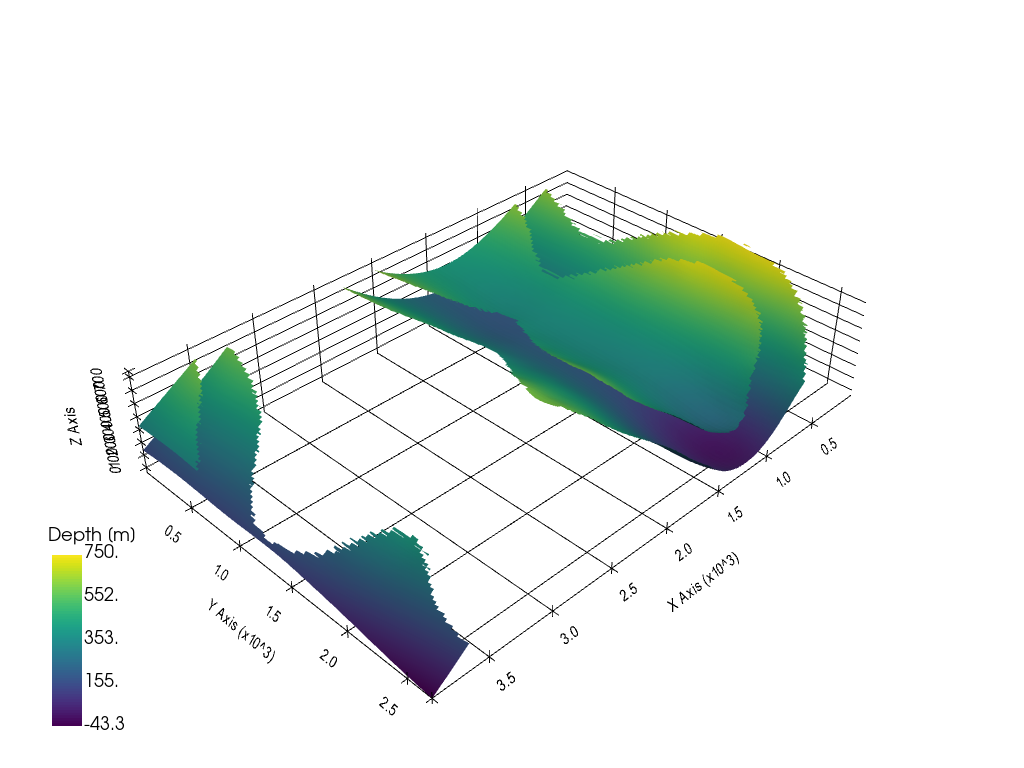

In [19]:
sargs = dict(height=0.25, vertical=True, position_x=0.05, position_y=0.05)

p = pv.Plotter(notebook=True)

p.add_mesh(mesh_dict['A'][0], scalars='Depth [m]', scalar_bar_args=sargs, clim=[0, 750])
p.add_mesh(mesh_dict['B'][0], scalars='Depth [m]')

p.show_grid(color= 'black')
p.set_background('white')
p.show()